# result_combination_final

2017-06-01

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 录入数据

In [28]:
mean_time_result = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/phase2.5/Mean/travel_time_submission.csv')

xgboost_time_result = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/phase2.5/xgboost_original/travel_time_submission.csv')

xgboost_time_result2 = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/phase2.5/xgboost_new/travel_time_submission.csv')

RF_time_result = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/submission_result/phase2.5/RF/travel_time_submission.csv')

last_result = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/final_submission/day1/travel_time_submission.csv')

xgboost_3 = pd.read_csv('/home/godcedric/GitLocal/KDDCUP2017/final_submission/submission_travelTime.csv')

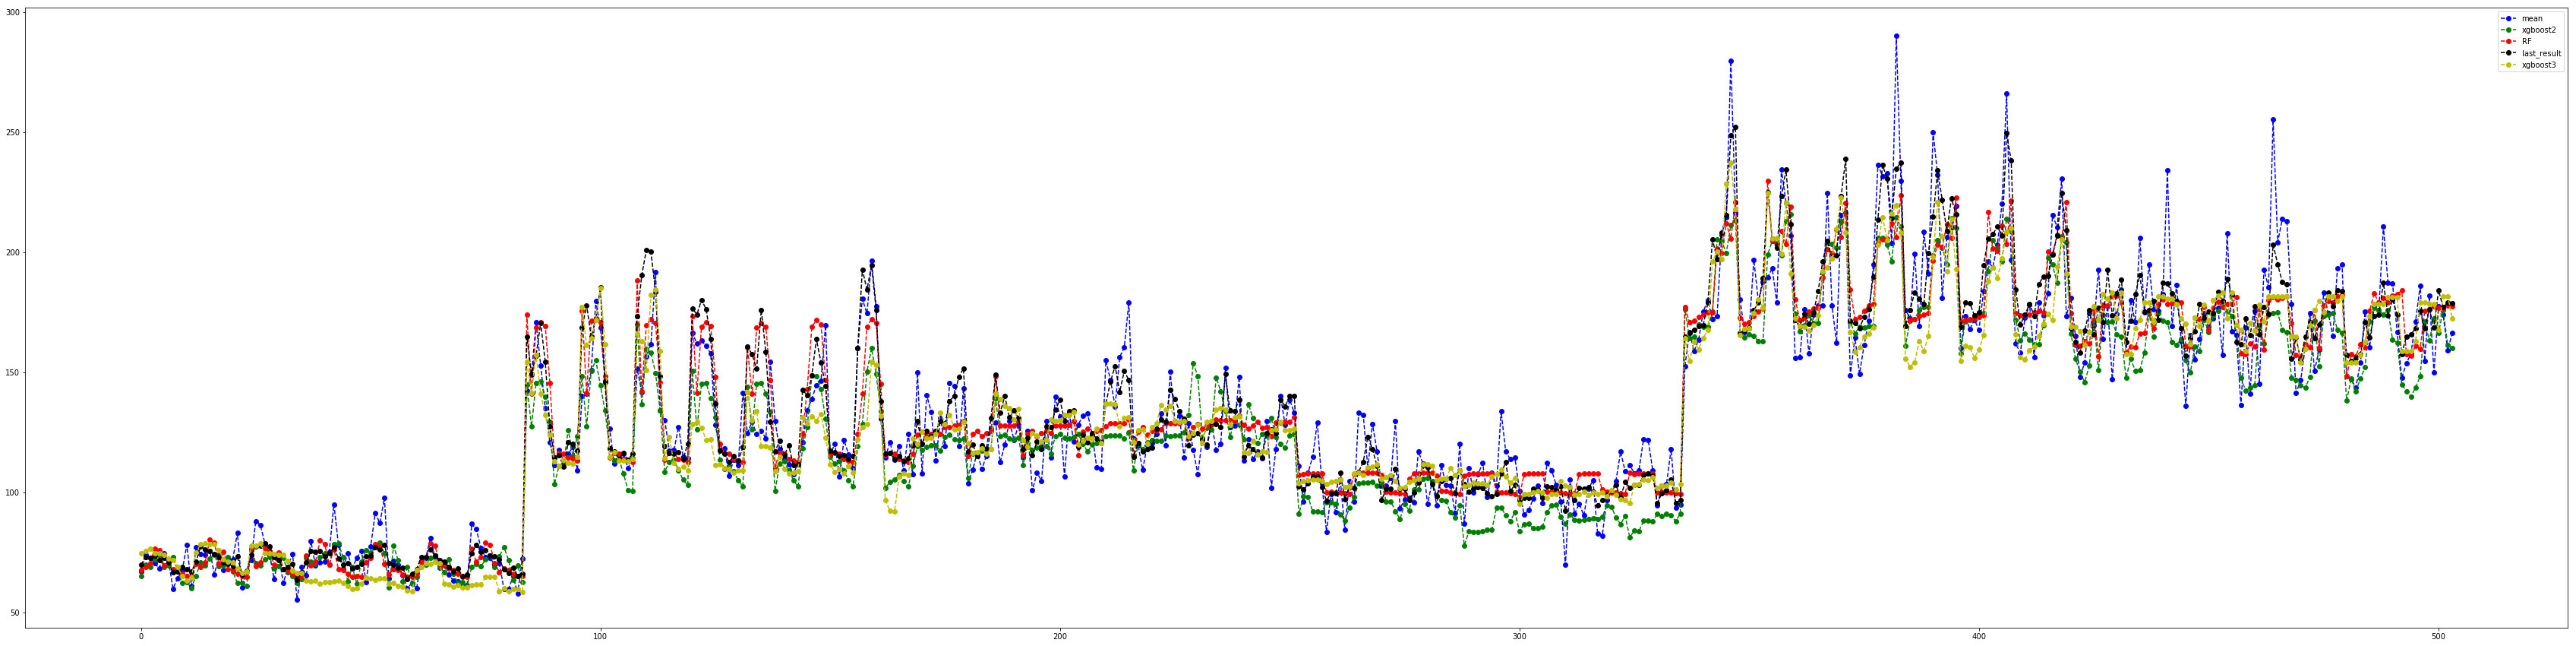

In [29]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(len(mean_time_result)), mean_time_result['avg_travel_time'],'b--o',label='mean')
#ax.plot(np.arange(len(xgboost_time_result)), xgboost_time_result['avg_travel_time'],'--o',label='xgboost')
ax.plot(np.arange(len(xgboost_time_result2)), xgboost_time_result2['avg_travel_time'],'g--o',label='xgboost2')
ax.plot(np.arange(len(RF_time_result)), RF_time_result['avg_travel_time'],'r--o',label='RF')
ax.plot(np.arange(len(last_result)), last_result['avg_travel_time'],'k--o',label='last_result')
ax.plot(np.arange(len(xgboost_3)), xgboost_3['avg_travel_time'],'y--o',label='xgboost3')
ax.legend()

### 与day1的差距

In [9]:
# 自定义评分函数
def MAPE2(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [10]:
# mean与result1
print(MAPE2(last_result['avg_travel_time'], mean_time_result['avg_travel_time']))

0.06781479838400246


In [11]:
# xgboost1
print(MAPE2(last_result['avg_travel_time'], xgboost_time_result['avg_travel_time']))

0.1003070256627361


In [12]:
# xgboost2
print(MAPE2(last_result['avg_travel_time'], xgboost_time_result2['avg_travel_time']))

0.07872134894231411


In [13]:
# RF
print(MAPE2(last_result['avg_travel_time'], RF_time_result['avg_travel_time']))

0.04682493392457987


### 融合

In [7]:
travel_time_submission = mean_time_result[['intersection_id', 'tollgate_id', 'time_window']]

In [31]:
time_result_1 = mean_time_result['avg_travel_time']
time_result_2 = xgboost_time_result2['avg_travel_time']
time_result_3 = xgboost_3['avg_travel_time']
time_result_4 = RF_time_result['avg_travel_time']
#time_result_5 = last_result['avg_travel_time']

In [32]:
# 精细化融合
A2_result = 0.5*time_result_1[0:84] + 0.2*time_result_2[0:84] + 0.3*time_result_4[0:84]
A3_result = 0.4*time_result_1[84:168] + 0.2*time_result_2[84:168] + 0.4*time_result_4[84:168]
B1_result = 0.4*time_result_1[168:252] + 0.3*time_result_2[168:252] + 0.3*time_result_4[168:252]
B3_result = 0.5*time_result_1[252:336] + 0.5*time_result_3[252:336]
C1_result = (time_result_1[336:420] + time_result_2[336:420] + time_result_3[336:420] )/3
C3_result = 0.3*time_result_1[420:504] + 0.4*time_result_3[420:504] + 0.4*time_result_4[420:504]

In [33]:
time_predict = np.concatenate([A2_result,A3_result,B1_result,B3_result,C1_result,C3_result], axis=0)

In [34]:
travel_time_submission['avg_travel_time'] = time_predict

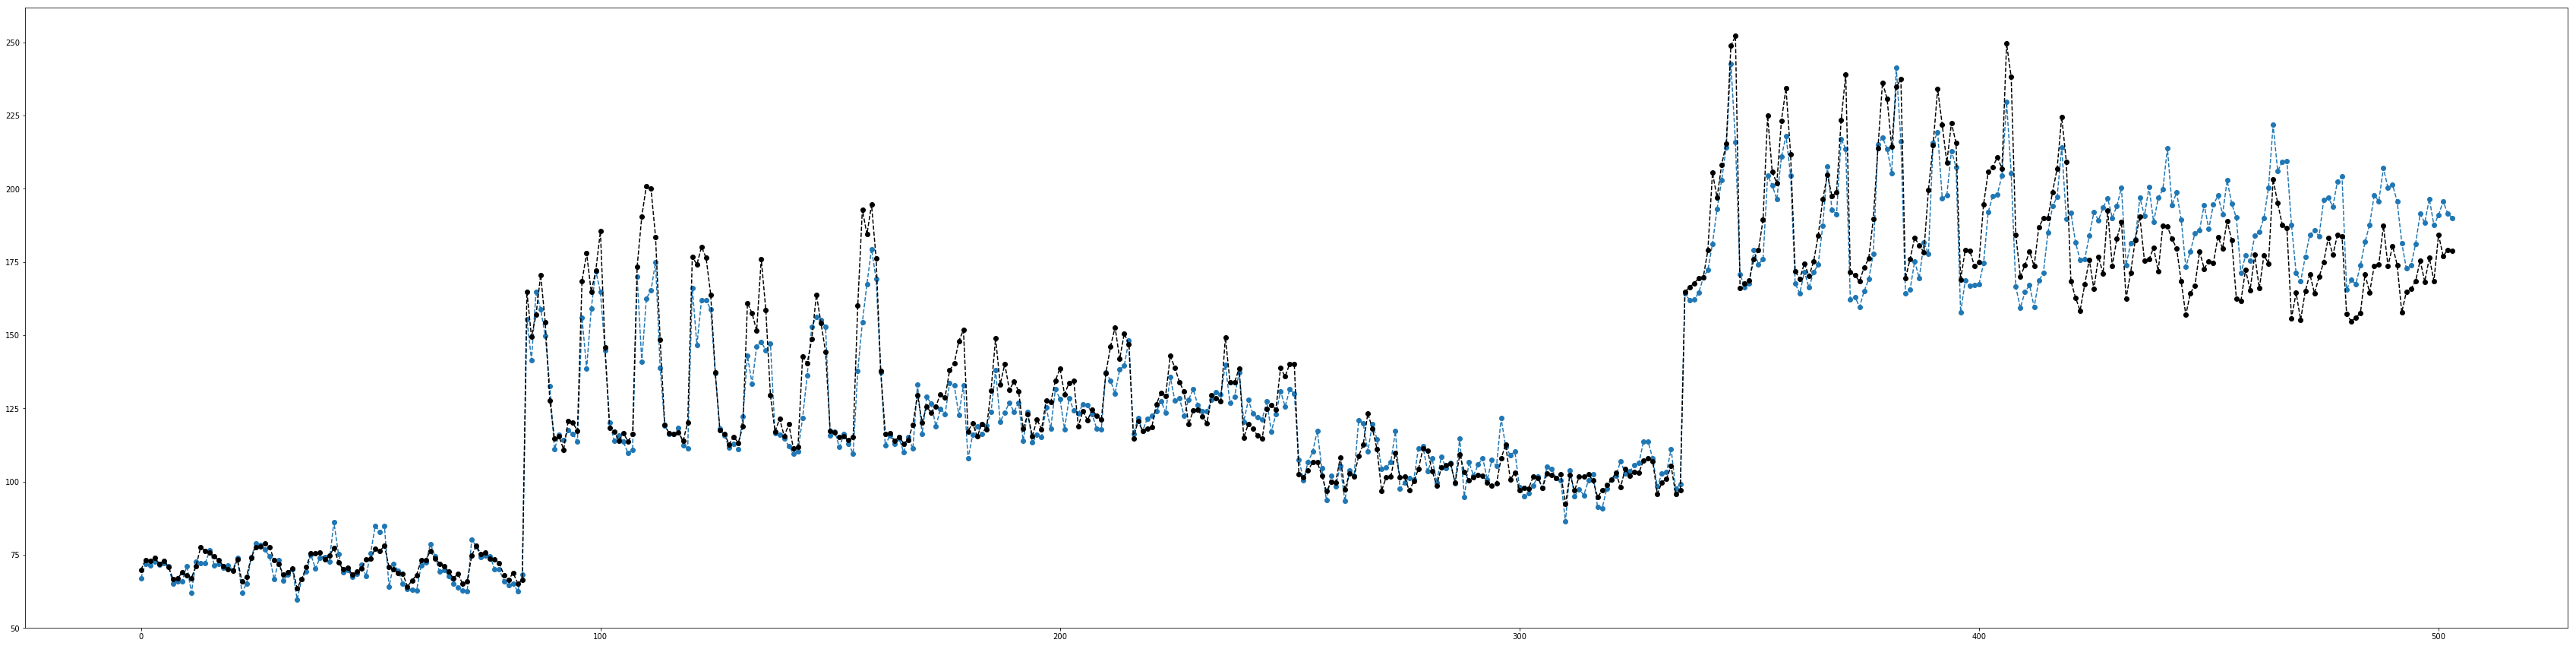

In [35]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(60)
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(len(travel_time_submission)), travel_time_submission['avg_travel_time'],'--o')
ax.plot(np.arange(len(last_result)), last_result['avg_travel_time'],'k--o',label='last_result')

In [36]:
travel_time_submission.to_csv('/home/godcedric/GitLocal/KDDCUP2017/final_submission/day4/travel_time_submission.csv', index=False)